In [112]:
import os, sys
sys.path.append(os.getcwd())

import random
import time

import matplotlib
#matplotlib.use('Agg')
import matplotlib.pyplot as plt
import numpy as np
import pickle as pkl
matplotlib.rcParams['text.usetex'] = True

In [113]:
LATENT_DIM = 8
ld = str(LATENT_DIM)

In [114]:
accuracy_histories = []
legend = []

In [115]:
from pingouin import multivariate_normality
import pandas as pd
import numpy as np

In [116]:
normalities = []

In [117]:
with open('./WGAN_GP_LATENT_DIM_'+ld +'_initialization_he.pkl', 'rb') as f:
    res = pkl.load(f)
x, y = zip(*list(res['accuracy'].items()))


accuracy_histories += [y]
legend += ['WGAN-GP']
p_values = []
for samples in res['sample'].values():
    p_values += [multivariate_normality(samples)[1]]
normalities.append(p_values)

In [118]:

with open('./WGAN_WC_LATENT_DIM_'+ld +'_initialization_he.pkl', 'rb') as f:
    res = pkl.load(f)
x, y = zip(*list(res['accuracy'].items()))

accuracy_histories += [y]

p_values = []
for samples in res['sample'].values():
    p_values += [multivariate_normality(samples)[1]]
legend += ['WGAN-WC']
normalities.append(p_values)

In [119]:
with open('./training_process_dump/P_SINKHORN_LAMBDA_0.5_LATENT_DIM_'+ld +'_initialization_he.pkl', 'rb') as f:
    res = pkl.load(f)
accuracy_histories += [res[1]]

res = res[0]
p_values = []
for samples in res['sample'].values():
    p_values += list(map(lambda x: multivariate_normality(x)[1], samples))
normalities.append(p_values)
legend += ['P Sinkhorn, $\lambda=0.5$']

In [120]:
with open('./training_process_dump/P_SINKHORN_LAMBDA_2.0_LATENT_DIM_'+ld +'_initialization_he.pkl', 'rb') as f:
    res = pkl.load(f)
accuracy_histories += [res[1]]
res = res[0]
p_values = []
for samples in res['sample'].values():
    p_values += list(map(lambda x: multivariate_normality(x)[1], samples))
normalities.append(p_values)
legend += ['P Sinkhorn, $\lambda=2.0$']

In [121]:
samples[0].shape

(2560, 32)

In [122]:
with open('./training_process_dump/NP_SINKHORN_LAMBDA_0.5_LATENT_DIM_'+ld +'_initialization_he_BATCHSIZE1024.pkl', 'rb') as f:
    res = pkl.load(f)
accuracy_histories += [res[1]]
res = res[0]
p_values = []
for it in res['sample']:
    samples = res['sample'][it]
    f = lambda x: multivariate_normality(x)[1]
    for sample in samples:
        while sample.shape[0]>254:
            p_values += [f(sample)]
            sample = sample[254:]
        p_values += [f(sample)]
        sample = sample[254:]
    print(it)
normalities.append(p_values)
legend += ['NP Sinkhorn, $\lambda=0.5$']
with open('./training_process_dump/NP_SINKHORN_LAMBDA_2.0_LATENT_DIM_'+ld +'_initialization_he_BATCHSIZE1024.pkl', 'rb') as f:
    res = pkl.load(f)
accuracy_histories += [res[1]]
res = res[0]
p_values = []
for samples in res['sample'].values():
    f = lambda x: multivariate_normality(x)[1]
    for sample in samples:
        while sample.shape[0]>254:
            p_values += [f(sample)]
            sample = sample[254:]
        p_values += [f(sample)]
        sample = sample[254:]
    print(it)
normalities.append(p_values)
legend += ['NP Sinkhorn, $\lambda=2.0$']

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54


In [139]:
with open('/Users/dasha/Dropbox/Discussion notes Ayfer, Xiugang, Daria/GAN_code/training_process_dump/NP_SINKHORN_LAMBDA_2.0_LATENT_DIM_'+ld +'_initialization_he_BATCHSIZE1024.pkl', 'rb') as f:
    res = pkl.load(f)
accuracy_histories += [res[1]]
res = res[0]
p_values = []
for samples in res['sample'].values():
    f = lambda x: multivariate_normality(x)[1]
    for sample in samples:
        while sample.shape[0]>254:
            p_values += [f(sample)]
            sample = sample[254:]
        p_values += [f(sample)]
        sample = sample[254:]
    print(it)
normalities.append(p_values)

54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54


In [123]:
matplotlib.rcParams['font.family'] = 'Avenir'
plt.rcParams['font.size'] = 18
plt.rcParams['axes.linewidth'] = 2

In [86]:
#legend = ['WGAN-GP', 'WGAN-WC', 'P Sinkhorn, $\lambda = 0.5$', 'P Sinkhorn, $\lambda = 2.0$', 'NP Sinkhorn, $\lambda = 0.5$', 'NP Sinkhorn, $\lambda = 2.0$']

In [160]:
normality = normalities[-1]

In [145]:
mult=4

In [158]:
len(np.arange(idx,iteration,step*mult))

250

In [164]:
del normalities[-2]

0 20000
0 20000
1 20000
1 20000
2 21505
2 20000
3 21505
3 20000
4 26840
4 20000
5 26840
5 20000


<Figure size 432x288 with 0 Axes>

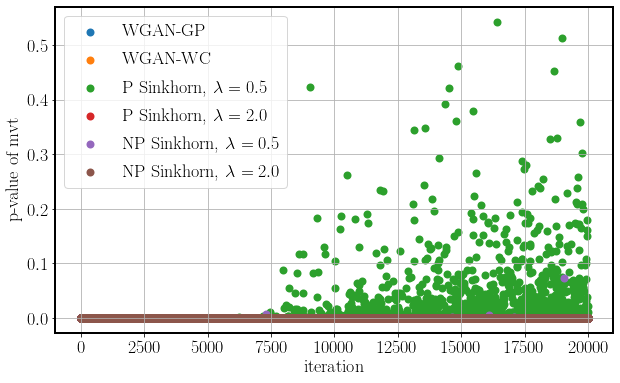

In [168]:
plt.clf()
step =1
plt.figure(figsize=(10,6))
plt.grid("on", "both")
iteration = 20000
bs_mult = 1
idx = 0

for i, normality in enumerate(normalities):
    #if i >3:
    #    mult = 4
    #else:
    #    mult = 1
    print(i, len(normality))
    normality = np.array(normality[:int(np.ceil(iteration/bs_mult))])
    print(i, len(normality))
    plt.scatter(np.arange(idx,iteration,step*bs_mult), normality[idx::int(np.ceil(step/bs_mult))], linewidth=2)

plt.legend(legend)
plt.xlabel("iteration")
plt.ylabel("p-value of mvt")
plt.savefig('final_plot'+ld+'normality.png')
plt.show()

In [107]:
new_normalities = normalities[:4] + normalities[-2:]

In [108]:
len(new_normalities)

6

In [109]:
tmp = normalities
normalities = new_normalities

In [111]:
np.unique(normalities[3])

array([0.00000000e+000, 1.12153016e-310, 1.90328923e-310, 3.62223332e-309,
       4.31336919e-308, 1.05075206e-307, 1.54087603e-306, 7.18251068e-306,
       5.84213283e-305, 6.01416617e-305, 1.50151448e-304, 1.35490825e-303,
       1.77261102e-303, 6.82059001e-301, 2.96504395e-300, 3.20574506e-299,
       7.39744395e-299, 1.01144850e-296, 6.33980420e-295, 1.46024642e-294,
       4.19419758e-294, 1.99243752e-293, 2.46343246e-292, 3.99536011e-292,
       4.79758503e-292, 1.05263399e-291, 3.77431258e-291, 2.64090972e-290,
       2.65217663e-289, 1.58659925e-288, 1.87245778e-287, 2.45868947e-287,
       3.96821672e-287, 4.74618949e-287, 4.32569889e-286, 5.05945108e-286,
       9.52703331e-286, 2.35103272e-284, 7.02433820e-284, 8.88179430e-284,
       1.67997391e-283, 1.77829390e-283, 2.02042005e-282, 3.72824918e-282,
       1.03829985e-281, 1.40958463e-281, 1.53347477e-281, 4.10970210e-281,
       4.56607935e-281, 6.24195016e-278, 6.64383380e-278, 9.32192450e-278,
       1.93707548e-277, 9

In [ ]:
print(1)

0
1
2
3
4
5


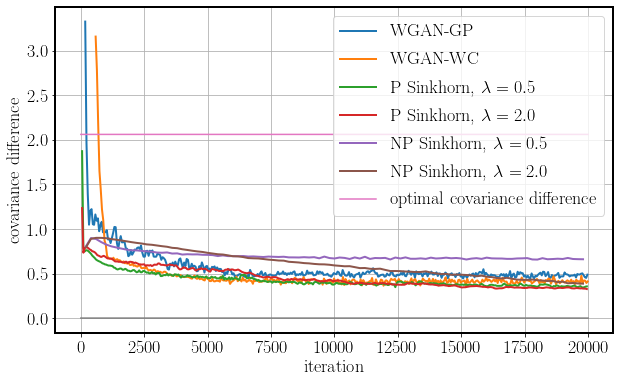

In [138]:
plt.figure(figsize=(10,6))
plt.grid("on", "both")
iteration = 20000
bs_mult = 1
for i, accuracy_history in enumerate(accuracy_histories):
    bs_mult = 4 if i > 3 else 1
    step = 50 * bs_mult
    print(i)
    if i < 2:
        accuracy_history = np.array(accuracy_history)[:iteration]
        idx = np.max(np.where(accuracy_history > 3.5))+1
        plt.plot(np.arange(idx,iteration,step), accuracy_history[idx::step], linewidth=2)
    else:
        accuracy_history = np.array(accuracy_history[:int(iteration/step)])
        idx = np.max(np.where(accuracy_history > 3.5))+1
        plt.plot(np.arange(idx*step,iteration,step), accuracy_history[idx:], linewidth=2)

plt.plot(np.arange(iteration+1), np.ones(iteration+1)*np.linalg.norm(true_cov - opt_cov))
plt.plot(np.arange(iteration+1), np.zeros(iteration+1))
plt.legend(legend + ['optimal covariance difference'])
plt.xlabel("iteration")
plt.ylabel("covariance difference")
plt.savefig('final_plot'+ld+'.png')
plt.show()
    

In [131]:
for i in range(len(accuracy_histories)):
    print(len(accuracy_histories[i]))

20000
20000
440
440
440
440


In [134]:
DATA_DIM = 32
true_cov = np.eye(DATA_DIM)/np.sqrt(np.sqrt(DATA_DIM))

In [136]:
opt_cov = np.copy(true_cov)
opt_cov[LATENT_DIM:] = 0

In [171]:
Y = np.random.randn(256, 32)

In [172]:
multivariate_normality(Y)

HZResults(hz=0.999999200841742, pval=0.37217942968575457, normal=True)